## Student Marks Prediction Using Linear Regression

In this regression problem, we will predict student percentage on the basis of numbers of hours student studies per day. Also in the problem, we will pedict how much a student will score after studying for 9.25 hours

#### Author Name- Devashish Rawat
#### Data Science and Business Analytics Intern
#### The Spark Foundations

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection      import train_test_split
from sklearn.linear_model         import LinearRegression
from sklearn                      import metrics 

### Importing and reading Data
Importing data from a URL

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see from the data that:-
- There are two columns, hours which is 'Hours' independent cplumn and 'Score' which is our Target column.
- There is no null values.
- Both columns are numeric type



So Data looks fine.

Lets Plot 2D plot between Hours and Score.

C:\Users\devas\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


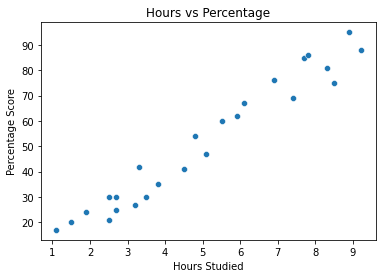

In [5]:
# Plotting the distribution of scores
sns.scatterplot(data['Hours'],data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

As we can see that data points are linearly distrubuted so we can apply linear regression.


### Spliting the Train Test Data

In [6]:
X=data['Hours'].values.reshape(-1, 1)
Y=data['Scores'].values

In [7]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=100)

### Training Model

In [8]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
model.score(X_test,y_test)

0.9403157736545141

C:\Users\devas\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


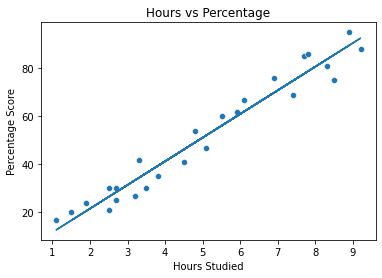

In [10]:
line = model.coef_*X+model.intercept_
sns.scatterplot(data['Hours'],data['Scores'])
plt.plot(X,line)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Prediction

In [11]:
y_pred= model.predict(X_test)
pred=pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
pred

,Actual,Prediction
0,25,28.477237
1,35,39.316855
2,42,34.389756
3,62,60.010669
4,20,16.652200
5,69,74.791966
6,76,69.864867


#### Q. What will be the score if a student studies for 9.25 Hours?

In [12]:
model.predict([[9.25]])

array([93.02223095])

If a student studies for 9.25 Hours then the student will score 93.02%

### Evaluation

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.666937869822485
